In [1]:
import lamindb as ln
import lnschema_bionty as lb
import bionty as bt

import scanpy as sc

from grnndata import GRNAnnData, from_anndata
from grnndata import utils 

lb.settings.organism = "human"

%load_ext autoreload
%autoreload 2

2024-01-15 11:44:27,663:INFO - Note: NumExpr detected 40 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.
2024-01-15 11:44:27,664:INFO - NumExpr defaulting to 8 threads.


💡 lamindb instance: jkobject/scprint


In [2]:
grn = from_anndata(sc.read('grn.h5ad'))

/home/ml4ig1/miniconda3/envs/training-gpt/lib/python3.10/site-packages/anndata/__init__.py:51: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(
/home/ml4ig1/miniconda3/envs/training-gpt/lib/python3.10/site-packages/anndata/_core/anndata.py:183: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


In [ ]:
# create louvain cluster #nx.community.louvain_communities(G, resolution)
# create umap #
# both from neighbor graph


In [17]:
grn = grn.T

In [60]:
grn.obsp['connectivities'] = nx.to_scipy_sparse_array(nx.dedensify(nx.from_numpy_array(grn.obsp["GRN"]), threshold=3)[0])[:-4,:-4]

In [63]:
sc.tl.louvain(grn, adjacency=grn.obsp['GRN'])

/home/ml4ig1/miniconda3/envs/training-gpt/lib/python3.10/site-packages/sklearn/manifold/_spectral_embedding.py:273: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
/home/ml4ig1/miniconda3/envs/training-gpt/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


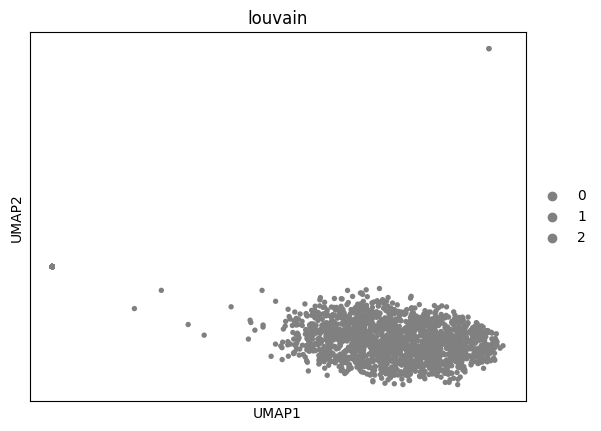

In [65]:
sc.tl.umap(grn, min_dist=0.5, spread=0.7)
sc.pl.umap(grn, color=['louvain'])

In [6]:
import networkx as nx
G = nx.from_numpy_array(grn.varp["GRN"])

In [7]:
conn = nx.is_connected(G)
conn

In [8]:
conn

True

In [1]:
grn.grn.sum(1).sort_values(ascending=False).head(20)

NameError: name 'grn' is not defined

In [9]:
#seems too long
clust_coef = nx.average_clustering(G)
clust_coef

KeyboardInterrupt: 

In [13]:
nx.algorithms.smetric.s_metric(G) #??
# I don't understand the output

/tmp/ipykernel_369233/4169779831.py:1: DeprecationWarning: 

The `normalized` keyword is deprecated and will be removed
in the future. To silence this warning, remove `normalized`
when calling `s_metric`.

The value of `normalized` is ignored.
  nx.algorithms.smetric.s_metric(G, normalized=True)


2517524445154.0

In [15]:
#seems too long
nx.sigma(G, niter=10, nrand=4)

KeyboardInterrupt: 

In [4]:
utils.metrics(grn)

KeyboardInterrupt: 

In [66]:
import decoupler as dc

In [71]:
dc.get_collectri(organism="human", split_complexes=True)

,source,target,weight,PMID
0,MYC,TERT,1,10022128;10491298;10606235;10637317;10723141;1...
1,SPI1,BGLAP,1,10022617
2,SMAD3,JUN,1,10022869;12374795
3,SMAD4,JUN,1,10022869;12374795
4,STAT5A,IL2,1,10022878;11435608;17182565;17911616;22854263;2...
...,...,...,...,...
43173,NFKB,hsa-miR-143-3p,1,19472311
43174,AP1,hsa-miR-206,1,19721712
43175,NFKB,hsa-miR-21-5p,1,20813833;22387281
43176,NFKB,hsa-miR-224-5p,1,23474441;23988648


## GENIE3

In [10]:
from bengrn.tools import GENIE3, get_link_list
import numpy as np

In [ ]:
def

In [28]:
mat = np.asarray(grn.X.todense())
names = grn.var_names[mat.sum(0)>0].tolist()
mat = mat[:,mat.sum(0)>0]

In [29]:
VIM = GENIE3(mat, gene_names=names, nthreads=30, ntrees=100)

Tree method: RF
K: sqrt
Number of trees: 100


running jobs on 30 threads

K: sqrt
Number of trees: 100


running jobs on 30 threads
Elapsed time: 736.29 seconds


In [36]:
GRNAnnData(grn=VIM, X=mat, var=names, obs=grn.obs)

AnnData object with n_obs × n_vars = 12239 × 1821
    obs: 'n_genes', 'n_counts', 'percent_mito', 'donor_id', 'assay_ontology_term_id', 'cell_type_ontology_term_id', 'development_stage_ontology_term_id', 'disease_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'is_primary_data', 'organism_ontology_term_id', 'sex_ontology_term_id', 'tissue_ontology_term_id', 'author_cell_type', 'suspension_type', 'cell_type', 'assay', 'disease', 'organism', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage', 'batch_id'
    var: 0
    varp: 'GRN'

# BoolODE

In [37]:
conf = open("../../benGRN/bengrn/tools/BoolODE/config-files/example-config.yaml", 'r') 

In [44]:
from bengrn.tools.BoolODE import BoolODE

In [47]:
model = BoolODE({"name": "test-1", "simulation_time": 2, "num_cells": 300, "do_parallel": True, "sample_cells": False, 'nClusters': 1, "model_definition": "dyn-linear.txt"}, dropout_jobs={"drop_cutoff": 0.5, "drop_prob": 0.2, "sample_size": 100})

In [48]:
model.execute_jobs()

Creating output folders
output/test-1 does not exist, creating it...
Starting simulations
Error in definition of job test-1
Please specify path to Boolean model


FileNotFoundError: [Errno 2] No such file or directory: 'data'

In [ ]:
# BoolODE is really, extremelly poorly coded.
# I'm not sure I can use it.
# I would advice people don't try

## Scenic

In [4]:
from arboreto.algo import grnboost2

from pyscenic.utils import modules_from_adjacencies
from pyscenic.prune import prune2df, df2regulons
from pyscenic.aucell import aucell

from ctxcore.rnkdb import FeatherRankingDatabase as RankingDatabase

import seaborn as sns

In [6]:
adjacencies = grnboost2(expression_data=grn.to_df(), tf_names=utils.TF, verbose=True)

preparing dask client


2024-01-14 15:44:42,920:INFO - To route to workers diagnostics web server please install jupyter-server-proxy: python -m pip install jupyter-server-proxy
2024-01-14 15:44:42,996:INFO - State start
2024-01-14 15:44:43,004:INFO -   Scheduler at:     tcp://127.0.0.1:39483
2024-01-14 15:44:43,008:INFO -   dashboard at:  http://127.0.0.1:8787/status
2024-01-14 15:44:43,010:INFO - Registering Worker plugin shuffle
2024-01-14 15:44:43,053:INFO -         Start Nanny at: 'tcp://127.0.0.1:37551'
2024-01-14 15:44:43,068:INFO -         Start Nanny at: 'tcp://127.0.0.1:45277'
2024-01-14 15:44:43,077:INFO -         Start Nanny at: 'tcp://127.0.0.1:40611'
2024-01-14 15:44:43,086:INFO -         Start Nanny at: 'tcp://127.0.0.1:43971'
2024-01-14 15:44:43,095:INFO -         Start Nanny at: 'tcp://127.0.0.1:44919'
2024-01-14 15:44:43,105:INFO -         Start Nanny at: 'tcp://127.0.0.1:40969'
2024-01-14 15:44:43,115:INFO -         Start Nanny at: 'tcp://127.0.0.1:35351'
2024-01-14 15:44:43,125:INFO -     

parsing input
creating dask graph
8 partitions
computing dask graph


/home/ml4ig1/miniconda3/envs/training-gpt/lib/python3.10/site-packages/distributed/client.py:3162: UserWarning: Sending large graph of size 85.90 MiB.
This may cause some slowdown.
Consider scattering data ahead of time and using futures.
  warnings.warn(
/home/ml4ig1/miniconda3/envs/training-gpt/lib/python3.10/site-packages/dask/dataframe/_pyarrow_compat.py:17: FutureWarning: Minimal version of pyarrow will soon be increased to 14.0.1. You are using 14.0.0. Please consider upgrading.
  warnings.warn(
/home/ml4ig1/miniconda3/envs/training-gpt/lib/python3.10/site-packages/dask/dataframe/_pyarrow_compat.py:17: FutureWarning: Minimal version of pyarrow will soon be increased to 14.0.1. You are using 14.0.0. Please consider upgrading.
  warnings.warn(
/home/ml4ig1/miniconda3/envs/training-gpt/lib/python3.10/site-packages/dask/dataframe/_pyarrow_compat.py:17: FutureWarning: Minimal version of pyarrow will soon be increased to 14.0.1. You are using 14.0.0. Please consider upgrading.
  warnin

shutting down client and local cluster


2024-01-14 15:54:09,461:INFO - Remove client Client-74d6a499-b2eb-11ee-95ed-cc96e515ed95
2024-01-14 15:54:09,463:INFO - Received 'close-stream' from tcp://127.0.0.1:42660; closing.
2024-01-14 15:54:09,465:INFO - Remove client Client-74d6a499-b2eb-11ee-95ed-cc96e515ed95
2024-01-14 15:54:09,471:INFO - Close client connection: Client-74d6a499-b2eb-11ee-95ed-cc96e515ed95
2024-01-14 15:54:09,479:INFO - Closing Nanny at 'tcp://127.0.0.1:37551'. Reason: nanny-close
2024-01-14 15:54:09,481:INFO - Nanny asking worker to close. Reason: nanny-close
2024-01-14 15:54:09,482:INFO - Closing Nanny at 'tcp://127.0.0.1:45277'. Reason: nanny-close
2024-01-14 15:54:09,484:INFO - Nanny asking worker to close. Reason: nanny-close
2024-01-14 15:54:09,485:INFO - Closing Nanny at 'tcp://127.0.0.1:40611'. Reason: nanny-close
2024-01-14 15:54:09,487:INFO - Nanny asking worker to close. Reason: nanny-close
2024-01-14 15:54:09,488:INFO - Closing Nanny at 'tcp://127.0.0.1:43971'. Reason: nanny-close
2024-01-14 15:5

finished



In [7]:
modules = list(modules_from_adjacencies(adjacencies, grn.to_df()))


2024-01-14 15:57:25,300 - pyscenic.utils - INFO - Calculating Pearson correlations.
2024-01-14 15:57:25,300:INFO - Calculating Pearson correlations.

2024-01-14 15:57:25,328 - pyscenic.utils - WARNING - Note on correlation calculation: the default behaviour for calculating the correlations has changed after pySCENIC verion 0.9.16. Previously, the default was to calculate the correlation between a TF and target gene using only cells with non-zero expression values (mask_dropouts=True). The current default is now to use all cells to match the behavior of the R verision of SCENIC. The original settings can be retained by setting 'rho_mask_dropouts=True' in the modules_from_adjacencies function, or '--mask_dropouts' from the CLI.
	Dropout masking is currently set to [False].
2024-01-14 15:57:25,300:INFO - Calculating Pearson correlations.

2024-01-14 15:57:25,328 - pyscenic.utils - WARNING - Note on correlation calculation: the default behaviour for calculating the correlations has change

In [9]:
modules[0]

Regulon(name='Regulon for ARID5B', gene2weight=frozendict.frozendict({'FNDC10': 15.296676077896603, 'IFITM1': 13.732857532195531, 'HTR5A': 11.698360604926924, 'ST6GALNAC5': 10.393957931038486, 'CLTB': 8.884283325539943, 'SERPINI1': 8.041892231231618, 'RAP1GAP': 7.831436960876866, 'PGM5P3-AS1': 7.694417399844953, 'NETO1': 7.0797589204955775, 'CALY': 6.757670359787027, 'MAP7D2': 6.43611117930042, 'CALM1': 6.2446743833722005, 'RGS16': 6.237824865730919, 'PCP2': 6.198245679367018, 'CYSLTR1': 6.163405500324172, 'CXCR4': 5.844254348235583, 'FBXL16': 5.7756350417710625, 'CCDC136': 5.73243482700615, 'VSTM2B': 5.518537611524163, 'MCTP1': 5.450651749633994, 'CXCL14': 5.423478789328487, 'ISL1': 5.3967424533207256, 'CACNG2': 5.367933788418174, 'CPNE6': 5.308144611356243, 'PGAM2': 5.2938578421614935, 'KRT222': 5.247048819243672, 'CNTN4': 5.075537033996166, 'TIMP1': 4.952779232771931, 'MMP15': 4.93045195950467, 'GABRR1': 4.768033866298751, 'NIF3L1': 4.767977609282711, 'CAMKV': 4.625992573175497, 'CA

In [36]:
regulons

[Regulon(name='CEBPB(+)', gene2weight=frozendict.frozendict({'LGI4': 5.085863455040807, 'GACAT2': 1.042274529146654, 'SNX10': 2.1680822790907537, 'TXNIP': 0.8343426503885731, 'SPINT2': 2.0868575141267693, 'CD9': 1.8712793440078312, 'NQO2': 2.1370278884238774, 'CD99L2': 1.0563357200707135, 'KCNG1': 2.4518171745015382, 'SNHG7': 1.740043360975596, 'NR2F2': 2.399171304326161, 'MVD': 1.5490863554574348, 'CAPNS1': 0.6579560918547853, 'ELOVL6': 1.4298648628372688, 'TCEA2': 0.8092534815053509, 'RAB6A': 0.7732474713177012, 'ARL8B': 0.9304451814046035, 'C1orf21': 0.48363941727989346, 'CD151': 1.5280524457841427, 'RGCC': 1.2238902879081985, 'CACNA1B': 5.710972523117908, 'CDK14': 1.484604364094115, 'RSPO4': 2.2329537785756557, 'IGFBP5': 1.8586343630155762, 'CPNE5': 3.488109039067517, 'ENDOG': 3.3894503436992642, 'APP': 2.316874901623787, 'VAT1L': 9.916660682968029, 'CYSTM1': 1.030196780824228, 'GOLIM4': 1.7464375520872983, 'KCNB2': 0.1798990016876957, 'RAX': 0.15823206642849466, 'DDAH1': 0.5653132

In [47]:
import numpy as np

In [50]:
var_names = grn.var_names.tolist()
da = np.zeros((len(var_names), len(var_names)), dtype=np.float)
for reg in regulons:
    i = var_names.index(reg.transcription_factor)
    for k, v in reg.gene2weight.items():
        da[i,var_names.index(k)] = v

var_names = grn.var_names.tolist()
da = np.zeros((len(var_names), len(var_names)), dtype=np.float)
for reg in regulons:
    i = var_names.index(reg.transcription_factor)
    for k, v in reg.gene2weight.items():
        da[i,var_names.index(k)] = v

/tmp/ipykernel_431597/3942979843.py:2: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  da = np.zeros((len(var_names), len(var_names)), dtype=np.float)


In [51]:
(da>0).sum()

1305

In [12]:
import os
import urllib.request

data_dir = "../data"
os.makedirs(data_dir, exist_ok=True)

url1 = "https://resources.aertslab.org/cistarget/motif2tf/motifs-v10nr_clust-nr.hgnc-m0.001-o0.0.tbl"
url2 = "https://resources.aertslab.org/cistarget/databases/homo_sapiens/hg38/refseq_r80/mc_v10_clust/gene_based/hg38_10kbp_up_10kbp_down_full_tx_v10_clust.genes_vs_motifs.rankings.feather"

file1 = os.path.join(data_dir, os.path.basename(url1))
file2 = os.path.join(data_dir, os.path.basename(url2))

if not os.path.exists(file1):
    urllib.request.urlretrieve(url1, file1)
if not os.path.exists(file2):
    urllib.request.urlretrieve(url2, file2)


In [16]:
dbs = RankingDatabase(fname=file2, name="genes_10kb_human_rank_v10")
dbs

In [19]:
df = prune2df([dbs], modules, file1)

/home/ml4ig1/miniconda3/envs/training-gpt/lib/python3.10/site-packages/dask/dataframe/_pyarrow_compat.py:17: FutureWarning: Minimal version of pyarrow will soon be increased to 14.0.1. You are using 14.0.0. Please consider upgrading.
  warnings.warn(


In [23]:
df

Enrichment            \
                                                               AUC       NES   
TF     MotifID                                                                 
CEBPB  tfdimers__MD00370                                  0.091376  3.670376   
       tfdimers__MD00195                                  0.085487  3.300735   
       tfdimers__MD00084                                  0.081338  3.040279   
CEBPD  tfdimers__MD00326                                  0.074726  3.153928   
EOMES  taipale_tf_pairs__POU2F1_TBX21_NTATKCAGYGTNA_CAP   0.149166  3.107213   
...                                                            ...       ...   
POU4F2 metacluster_70.19                                  0.157053  3.587198   
       metacluster_70.17                                  0.153360  3.476727   
SOX9   tfdimers__MD00269                                  0.096036  3.503377   
TFAP2C tfdimers__MD00050                                  0.108567  3.642484   
       tfdimers__MD00127                                  0.109490  3.683283   

                                                                               \
                                                        MotifSimilarityQvalue   
TF     MotifID                                                                  
CEBPB  tfdimers__MD00370                                         4.488090e-07   
       tfdimers__MD00195                                         1.652350e-07   
       tfdimers__MD00084                                         2.086330e-08   
CEBPD  tfdimers__MD00326                                         1.279710e-11   
EOMES  taipale_tf_pairs__POU2F1_TBX21_NTATKCAGYGTNA_CAP          4.141000e-13   
...                                                                       ...   
POU4F2 metacluster_70.19                                         9.767730e-18   
       metacluster_70.17                                         1.026520e-19   
SOX9   tfdimers__MD00269                                         6.778200e-06   
TFAP2C tfdimers__MD00050                                         9.839210e-08   
       tfdimers__MD00127                                         0.000000e+00   

                                                                             \
                                                        OrthologousIdentity   
TF     MotifID                                                                
CEBPB  tfdimers__MD00370                                           1.000000   
       tfdimers__MD00195                                           1.000000   
       tfdimers__MD00084                                           1.000000   
CEBPD  tfdimers__MD00326                                           1.000000   
EOMES  taipale_tf_pairs__POU2F1_TBX21_NTATKCAGYGTNA_CAP            1.000000   
...                                                                     ...   
POU4F2 metacluster_70.19                                           0.251834   
       metacluster_70.17                                           0.138814   
SOX9   tfdimers__MD00269                                           1.000000   
TFAP2C tfdimers__MD00050                                           1.000000   
       tfdimers__MD00127                                           1.000000   

                                                                                                            \
                                                                                                Annotation   
TF     MotifID                                                                                               
CEBPB  tfdimers__MD00370                                 gene is annotated for similar motif tfdimers__...   
       tfdimers__MD00195                                 gene is annotated for similar motif tfdimers__...   
       tfdimers__MD00084                                 motif similar to tfdimers__MD00323 ('M01712_fo...   
CEBPD  tfdimers__MD00326         

In [24]:
regulons = df2regulons(df)

Create regulons from a dataframe of enriched features.
Additional columns saved: []

Additional columns saved: []


In [26]:
regulons[0]

Regulon(name='CEBPB(+)', gene2weight=frozendict.frozendict({'LGI4': 5.085863455040807, 'GACAT2': 1.042274529146654, 'SNX10': 2.1680822790907537, 'TXNIP': 0.8343426503885731, 'SPINT2': 2.0868575141267693, 'CD9': 1.8712793440078312, 'NQO2': 2.1370278884238774, 'CD99L2': 1.0563357200707135, 'KCNG1': 2.4518171745015382, 'SNHG7': 1.740043360975596, 'NR2F2': 2.399171304326161, 'MVD': 1.5490863554574348, 'CAPNS1': 0.6579560918547853, 'ELOVL6': 1.4298648628372688, 'TCEA2': 0.8092534815053509, 'RAB6A': 0.7732474713177012, 'ARL8B': 0.9304451814046035, 'C1orf21': 0.48363941727989346, 'CD151': 1.5280524457841427, 'RGCC': 1.2238902879081985, 'CACNA1B': 5.710972523117908, 'CDK14': 1.484604364094115, 'RSPO4': 2.2329537785756557, 'IGFBP5': 1.8586343630155762, 'CPNE5': 3.488109039067517, 'ENDOG': 3.3894503436992642, 'APP': 2.316874901623787, 'VAT1L': 9.916660682968029, 'CYSTM1': 1.030196780824228, 'GOLIM4': 1.7464375520872983, 'KCNB2': 0.1798990016876957, 'RAX': 0.15823206642849466, 'DDAH1': 0.56531322

In [27]:
auc_mtx = aucell(grn.to_df(), regulons, num_workers=8)

/home/ml4ig1/miniconda3/envs/training-gpt/lib/python3.10/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
/home/ml4ig1/miniconda3/envs/training-gpt/lib/python3.10/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


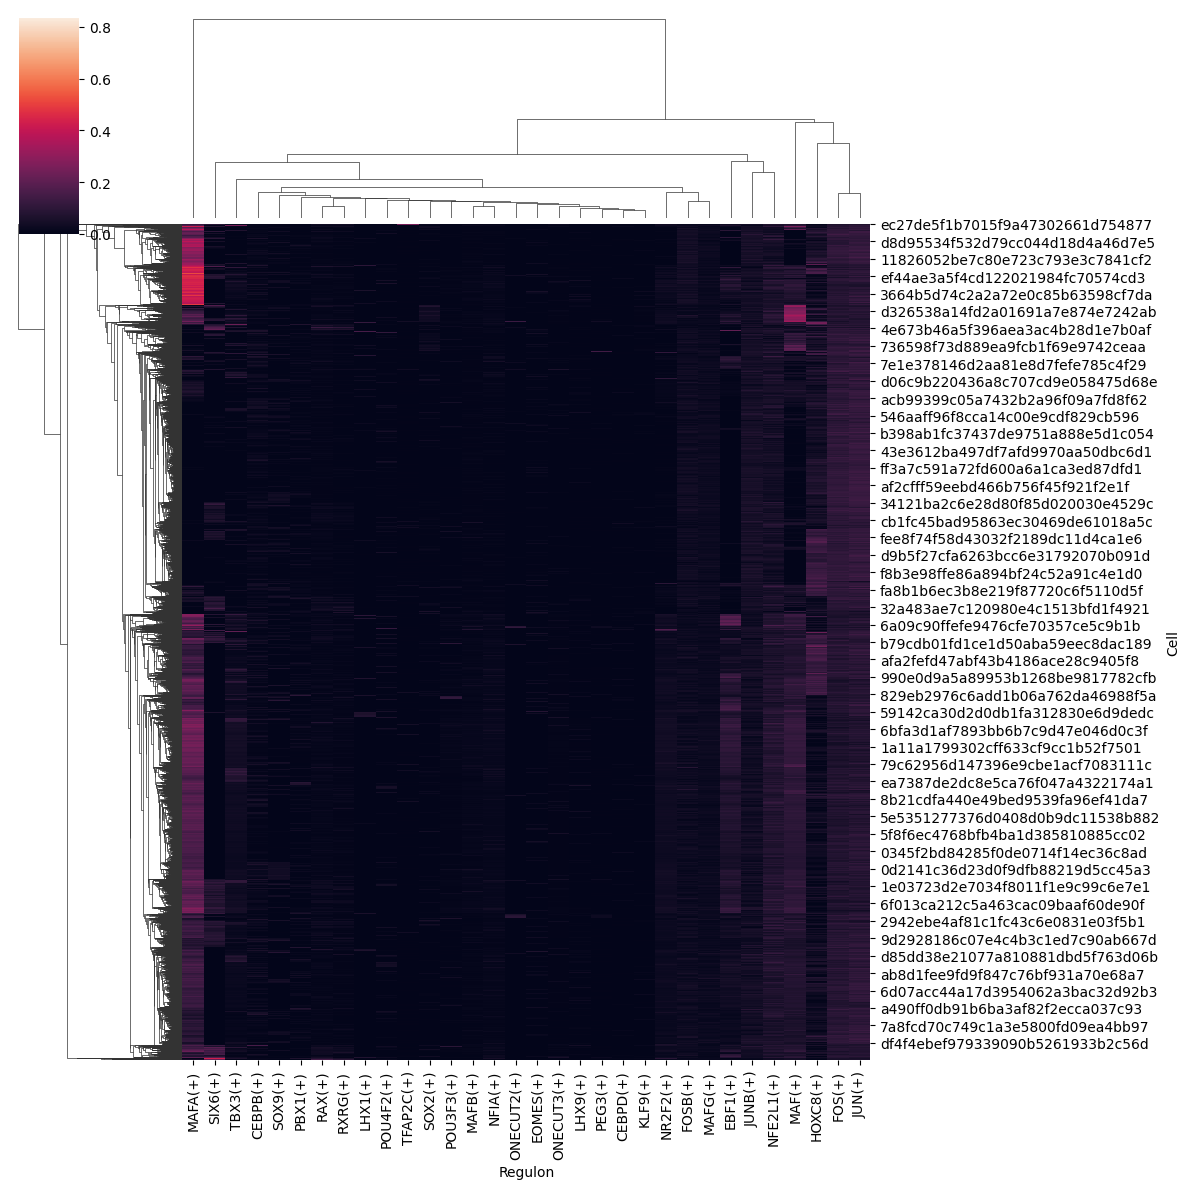

In [28]:
sns.clustermap(auc_mtx, figsize=(12,12))

## hESC KO/Chip ground truth from

In [19]:
import pandas as pd
from anndata import AnnData, concat

In [14]:
adata_liu = AnnData((2**pd.read_csv('../../benGRN/data/GroundTruth/remisdata/scRNA/liu_rna_filtered_log2.tsv', sep='\t'))-1).T
adata_chen = AnnData((2**pd.read_csv('../../benGRN/data/GroundTruth/remisdata/scRNA/chen_rna_filtered_log2.tsv', sep='\t'))-1).T
# (72, 23153) + (385,8595)
adata_chen, adata_liu

AnnData object with n_obs × n_vars = 385 × 8595

In [21]:
adata_liu.obs['dataset'] = "liu"
adata_chen.obs['dataset'] = "chen"

In [24]:
adata = concat([adata_liu, adata_chen], join="outer")

In [30]:
df = pd.read_csv('../../benGRN/data/GroundTruth/remisdata/hESC_ground_truth.tsv', sep="\t", header=None)

In [ ]:
return add_long_form_to(adata, df)

In [49]:
def add_long_form_to(adata, longform_df):
    varnames = adata.var_names.tolist()
    da = np.zeros((len(varnames), len(varnames)), dtype=np.float)
    svar = set(varnames)
    for i, j in longform_df.values:
        if i in svar and j in svar:
            da[varnames.index(i),varnames.index(j)] = 1
    return GRNAnnData(adata, grn=da)

/tmp/ipykernel_439499/1761231332.py:2: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  da = np.zeros((len(varnames), len(varnames)), dtype=np.float)


In [53]:
GRNAnnData(adata, grn=da)

AnnData object with n_obs × n_vars = 457 × 23935
    obs: 'dataset'
    varp: 'GRN'

## multi omics derived networks

In [11]:
from loomxpy.loomxpy import SCopeLoom

In [149]:
brain = SCopeLoom.read_loom(
    '../../benGRN/data/10xPBMC_homo_scenicplus_genebased_scope.loom'
)

In [150]:
adata = AnnData(brain.ex_mtx, obs=pd.concat([pd.DataFrame(v, columns=[k]) for k, v in brain.col_attrs.items()], axis=1).set_index("CellID"), var=pd.concat([pd.DataFrame(v, columns=[k]) for k, v in brain.row_attrs.items()], axis=1).set_index("Gene"))
for k, v in brain.embeddings.items():
    adata.obsm[k] = v.embedding.values

adata.uns = {i['name']: i['values'] for i in brain.global_attrs["MetaData"]['annotations']}
adata.uns['regulon_thresholds'] = brain.global_attrs["MetaData"]['regulonThresholds']

regulons_array = np.asarray(brain.row_attrs['Regulons'])
regulons_df = pd.DataFrame([reg.tolist() for reg in regulons_array], columns=regulons_array.dtype.names)
regulons_df.index = adata.var.index
adata.varm['regulons'] = regulons_df

varnames = adata.var_names.tolist()
da = np.zeros((len(varnames), len(varnames)), dtype=np.float)
for i, (_ , row) in enumerate(adata.varm['regulons'].iterrows()):
    names = row[row>0].index.tolist()
    for name in names:
        sign = name.split('_')[1]
        name = name.split('_')[0]
        da[i, varnames.index(name)] = 1 if sign == '+' else -1



/tmp/ipykernel_439499/2769365947.py:14: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  da = np.zeros((len(varnames), len(varnames)), dtype=np.float)


In [151]:
grn = GRNAnnData(adata, grn=da)

## comparisons of networks